- An introduction to reinforcement learning for neuroscience

- Temporal difference learning
- Q learning (SARSA)
- Model-free and model-based reinforcement learning
- Policy gradient
  
- Distributional reinforcement learning

In [3]:
using Random, LinearAlgebra, PyPlot

In [2]:
# 迷路の定義 (0: 空きマス, 1: 壁, 2: スタート, 3: ゴール)
maze = [
    2  0  0  0  0;
    1  1  1  1  0;
    0  0  0  1  0;
    0  1  0  0  0;
    3  1  1  1  0
]

# 可能な移動方向
actions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # 右, 下, 左, 上

epsilon = 0.1   # ε-greedy 方策の確率
alpha = 0.5     # 学習率
gamma = 0.9     # 割引率

0.9

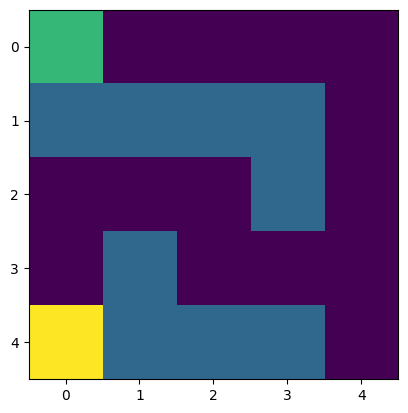

PyObject <matplotlib.image.AxesImage object at 0x00000199D7F9ED20>

In [4]:
imshow(maze)

Q tableをstate x actionの25 x 4にする．

In [6]:
global q_table = Dict()

# 状態をキーとしてQ値を取得
function get_q_value(state, action)
    return get(q_table, (state, action), 0.0)
end

# Q学習の更新式
function update_q_value(state, action, reward, next_state)
    max_q_next = maximum([get_q_value(next_state, a) for a in actions])
    q_table[(state, action)] = get_q_value(state, action) + alpha * (reward + gamma * max_q_next - get_q_value(state, action))
end

# エージェントの移動
function move(state, action)
    new_state = (state[1] + action[1], state[2] + action[2])
    if 1 <= new_state[1] <= size(maze, 1) && 1 <= new_state[2] <= size(maze, 2) && maze[new_state...] != 1
        return new_state
    end
    return state  # 壁にぶつかったらそのまま
end

# ε-greedy 方策で行動選択
function choose_action(state)
    if rand() < epsilon
        return rand(actions)  # ランダム行動
    else
        return argmax(a -> get_q_value(state, a), actions)  # 最大Q値の行動
    end
end

choose_action (generic function with 1 method)

In [8]:
# 学習実行
function train(num_episodes=500)
    for _ in 1:num_episodes
        state = findfirst(x -> x == 2, maze)  # スタート位置
        while maze[state[1], state[2]] != 3
            action = choose_action(state)
            next_state = move(state, action)
            reward = maze[next_state[1], next_state[2]] == 3 ? 1.0 : -0.01
            update_q_value(state, action, reward, next_state)
            state = next_state
        end
    end
end

train (generic function with 2 methods)

In [9]:
train()

In [14]:
keys(q_table)

KeySet for a Dict{Any, Any} with 64 entries. Keys:
  ((1, 5), (-1, 0))
  ((4, 1), (1, 0))
  ((3, 2), (0, 1))
  ((1, 1), (0, -1))
  (CartesianIndex(1, 1), (0, 1))
  ((1, 5), (1, 0))
  ((3, 5), (-1, 0))
  ((1, 2), (0, -1))
  ((3, 1), (0, -1))
  ((2, 5), (0, -1))
  ((3, 5), (1, 0))
  ((4, 3), (0, 1))
  ((4, 4), (0, 1))
  ((3, 2), (0, -1))
  (CartesianIndex(1, 1), (0, -1))
  ((5, 5), (-1, 0))
  ((5, 5), (1, 0))
  ((4, 3), (0, -1))
  ((4, 4), (0, -1))
  ((4, 1), (0, 1))
  ((1, 5), (0, 1))
  ((3, 5), (0, 1))
  ((4, 5), (-1, 0))
  ((1, 3), (-1, 0))
  ((4, 1), (0, -1))
  ⋮

In [11]:
# 迷路の解答パスを表示
function print_solution()
    state = findfirst(x -> x == 2, maze)
    solution = fill(" ", size(maze))
    solution[state[1], state[2]] = "S"
    while maze[state[1], state[2]] != 3
        action = argmax(a -> get_q_value(state, a), actions)
        state = move(state, action)
        solution[state[1], state[2]] = maze[state[1], state[2]] == 3 ? "G" : "."
    end
    println(join([join(row, " ") for row in eachrow(solution)], "\n"))
end

print_solution (generic function with 1 method)

In [12]:
print_solution()

S . . . .
        .
. . .   .
.   . . .
G        
